  Preparing metadata (setup.py) ... done
✅ All libraries imported successfully!
TensorFlow version: 2.19.0
🚀 STOCKSENSE - ML-Based Stock Price Movement Predictor
📊 Fetching data for AAPL...
✅ Data fetched: 501 trading days
🔧 Creating technical indicators...
✅ Created 30 features
📈 Creating visualizations...


🔄 Preparing sequences (length=60)...
✅ Created 407 sequences
   Shape: X=(407, 60, 16), y=(407,)
   Class distribution: [145  62 200]

📊 Data Split:
   Train: 284 samples
   Val: 61 samples
   Test: 62 samples
🏗️ Building LSTM model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 60, 256)        │       148,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 60, 128)        │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 360,387 (1.37 MB)

 Trainable params: 360,387 (1.37 MB)

 Non-trainable params: 0 (0.00 B)

None
🎯 Training model...
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 469ms/step - accuracy: 0.3522 - loss: 1.0563 - val_accuracy: 0.5082 - val_loss: 0.9961 - learning_rate: 0.0010
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 411ms/step - accuracy: 0.4968 - loss: 0.9884 - val_accuracy: 0.5082 - val_loss: 0.9997 - learning_rate: 0.0010
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 342ms/step - accuracy: 0.4642 - loss: 1.0378 - val_accuracy: 0.5082 - val_loss: 0.9998 - learning_rate: 0.0010
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 317ms/step - accuracy: 0.4219 - loss: 1.0204 - val_accuracy: 0.5082 - val_loss: 0.9975 - learning_rate: 0.0010
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 322ms/step - accuracy: 0.4708 - loss: 1.0512 - val_accuracy: 0.5082 - val_loss: 0.9950 - learning_rate: 0.0010
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 401ms/step - accuracy: 0.5516 - loss: 0.9714 - val_accuracy: 0.5082 - val_loss: 0.9928 - learning_rate: 0.0010
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 383ms/step - accuracy: 0.492

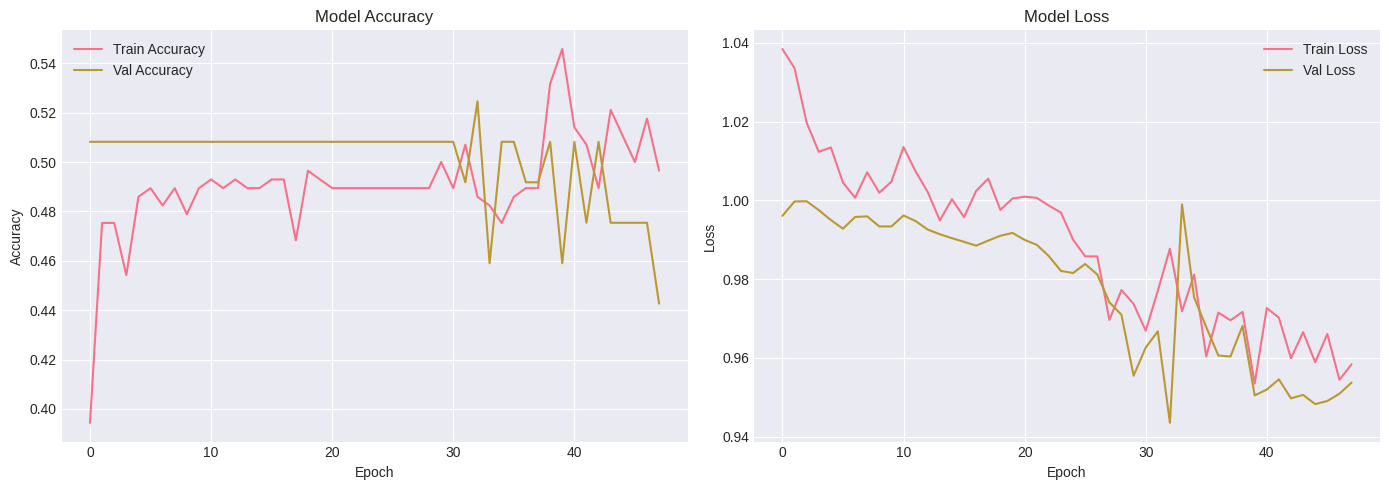

📊 Evaluating model...
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step

✅ Test Accuracy: 0.4355

Classification Report:
              precision    recall  f1-score   support

        Down       0.35      0.45      0.39        20
    Sideways       0.00      0.00      0.00        12
          Up       0.50      0.60      0.55        30

    accuracy                           0.44        62
   macro avg       0.28      0.35      0.31        62
weighted avg       0.35      0.44      0.39        62



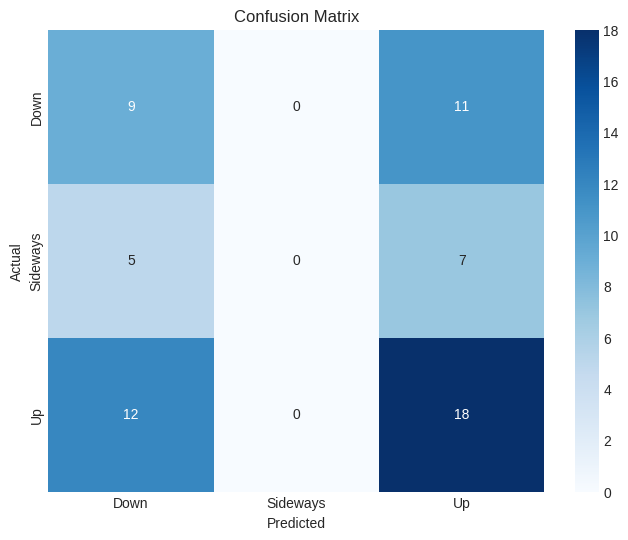


✅ StockSense Training Complete!
   Final Test Accuracy: 43.55%


In [1]:


# Project by Ayush_d172005
!pip install yfinance ta plotly scikit-learn tensorflow -q

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ta
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")

# Collecting the data
def fetch_stock_data(ticker, period='2y'):
    """Fetch stock data from Yahoo Finance"""
    print(f"📊 Fetching data for {ticker}...")
    stock = yf.Ticker(ticker)
    df = stock.history(period=period)
    print(f"✅ Data fetched: {len(df)} trading days")
    return df

# ========== FEATURE ENGINEERING ==========
def create_technical_indicators(df):
    """Create technical indicators for ML features"""
    print("🔧 Creating technical indicators...")

    # Price-based features
    df['Returns'] = df['Close'].pct_change()
    df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))

    # Moving Averages
    df['SMA_5'] = ta.trend.sma_indicator(df['Close'], window=5)
    df['SMA_10'] = ta.trend.sma_indicator(df['Close'], window=10)
    df['SMA_20'] = ta.trend.sma_indicator(df['Close'], window=20)
    df['EMA_12'] = ta.trend.ema_indicator(df['Close'], window=12)
    df['EMA_26'] = ta.trend.ema_indicator(df['Close'], window=26)

    # MACD
    macd = ta.trend.MACD(df['Close'])
    df['MACD'] = macd.macd()
    df['MACD_Signal'] = macd.macd_signal()
    df['MACD_Diff'] = macd.macd_diff()

    # RSI
    df['RSI'] = ta.momentum.rsi(df['Close'], window=14)

    # Bollinger Bands
    bollinger = ta.volatility.BollingerBands(df['Close'])
    df['BB_High'] = bollinger.bollinger_hband()
    df['BB_Low'] = bollinger.bollinger_lband()
    df['BB_Mid'] = bollinger.bollinger_mavg()
    df['BB_Width'] = (df['BB_High'] - df['BB_Low']) / df['BB_Mid']

    # Stochastic Oscillator
    stoch = ta.momentum.StochasticOscillator(df['High'], df['Low'], df['Close'])
    df['Stoch_K'] = stoch.stoch()
    df['Stoch_D'] = stoch.stoch_signal()

    # Average True Range (Volatility)
    df['ATR'] = ta.volatility.average_true_range(df['High'], df['Low'], df['Close'])

    # Volume indicators
    df['Volume_SMA'] = df['Volume'].rolling(window=20).mean()
    df['Volume_Ratio'] = df['Volume'] / df['Volume_SMA']

    # Price momentum
    df['Momentum'] = df['Close'] - df['Close'].shift(4)

    # Target variable: Next day movement
    df['Price_Tomorrow'] = df['Close'].shift(-1)
    df['Target'] = 0  # Sideways
    df.loc[df['Price_Tomorrow'] > df['Close'] * 1.002, 'Target'] = 1  # Up (>0.2%)
    df.loc[df['Price_Tomorrow'] < df['Close'] * 0.998, 'Target'] = -1  # Down (<-0.2%)

    df.dropna(inplace=True)

    print(f"✅ Created {len(df.columns)} features")
    return df

# ========== DATA VISUALIZATION ==========
def visualize_stock_data(df, ticker):
    """Create interactive visualizations"""
    print("📈 Creating visualizations...")

    # Create subplots
    fig = make_subplots(
        rows=4, cols=1,
        subplot_titles=(f'{ticker} Price & Moving Averages', 'MACD', 'RSI', 'Volume'),
        vertical_spacing=0.05,
        row_heights=[0.4, 0.2, 0.2, 0.2]
    )

    # Price and Moving Averages
    fig.add_trace(go.Candlestick(x=df.index, open=df['Open'], high=df['High'],
                                  low=df['Low'], close=df['Close'], name='Price'),
                  row=1, col=1)
    fig.add_trace(go.Scatter(x=df.index, y=df['SMA_20'], name='SMA 20',
                             line=dict(color='orange', width=1)), row=1, col=1)
    fig.add_trace(go.Scatter(x=df.index, y=df['EMA_12'], name='EMA 12',
                             line=dict(color='blue', width=1)), row=1, col=1)

    # MACD
    fig.add_trace(go.Scatter(x=df.index, y=df['MACD'], name='MACD',
                             line=dict(color='blue', width=1)), row=2, col=1)
    fig.add_trace(go.Scatter(x=df.index, y=df['MACD_Signal'], name='Signal',
                             line=dict(color='red', width=1)), row=2, col=1)
    fig.add_trace(go.Bar(x=df.index, y=df['MACD_Diff'], name='MACD Histogram'),
                  row=2, col=1)

    # RSI
    fig.add_trace(go.Scatter(x=df.index, y=df['RSI'], name='RSI',
                             line=dict(color='purple', width=2)), row=3, col=1)
    fig.add_hline(y=70, line_dash="dash", line_color="red", row=3, col=1)
    fig.add_hline(y=30, line_dash="dash", line_color="green", row=3, col=1)

    # Volume
    colors = ['red' if row['Close'] < row['Open'] else 'green' for _, row in df.iterrows()]
    fig.add_trace(go.Bar(x=df.index, y=df['Volume'], name='Volume',
                         marker_color=colors), row=4, col=1)

    fig.update_layout(height=1200, showlegend=True, title_text=f"StockSense Analysis - {ticker}")
    fig.update_xaxes(rangeslider_visible=False)
    fig.show()

# ========== MODEL BUILDING ==========
def prepare_sequences(df, seq_length=60):
    """Prepare sequences for LSTM"""
    print(f"🔄 Preparing sequences (length={seq_length})...")

    feature_cols = ['Close', 'Volume', 'Returns', 'SMA_5', 'SMA_10', 'SMA_20',
                    'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'RSI',
                    'BB_Width', 'Stoch_K', 'ATR', 'Volume_Ratio', 'Momentum']

    # Scale features
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(df[feature_cols])

    X, y = [], []
    for i in range(seq_length, len(scaled_features)):
        X.append(scaled_features[i-seq_length:i])
        y.append(df['Target'].iloc[i])

    X, y = np.array(X), np.array(y)

    # Convert to classification (0: Down, 1: Sideways, 2: Up)
    y = y + 1

    print(f"✅ Created {len(X)} sequences")
    print(f"   Shape: X={X.shape}, y={y.shape}")
    print(f"   Class distribution: {np.bincount(y.astype(int))}")

    return X, y, scaler, feature_cols

def build_lstm_model(input_shape, num_classes=3):
    """Build Bidirectional LSTM model"""
    print("🏗️ Building LSTM model...")

    model = Sequential([
        Bidirectional(LSTM(128, return_sequences=True), input_shape=input_shape),
        Dropout(0.3),
        Bidirectional(LSTM(64, return_sequences=True)),
        Dropout(0.3),
        Bidirectional(LSTM(32)),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    print(model.summary())
    return model

def train_model(model, X_train, y_train, X_val, y_val):
    """Train the model"""
    print("🎯 Training model...")

    callbacks = [
        EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)
    ]

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        callbacks=callbacks,
        verbose=1
    )

    return history

# ========== EVALUATION ==========
def evaluate_model(model, X_test, y_test):
    """Evaluate model performance"""
    print("📊 Evaluating model...")

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    accuracy = accuracy_score(y_test, y_pred_classes)

    print(f"\n✅ Test Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_classes,
                                target_names=['Down', 'Sideways', 'Up']))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Down', 'Sideways', 'Up'],
                yticklabels=['Down', 'Sideways', 'Up'])
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    return accuracy, y_pred_classes

def plot_training_history(history):
    """Plot training history"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Accuracy
    ax1.plot(history.history['accuracy'], label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Val Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    # Loss
    ax2.plot(history.history['loss'], label='Train Loss')
    ax2.plot(history.history['val_loss'], label='Val Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

# ========== MAIN EXECUTION ==========
def main():
    """Main execution function"""
    print("=" * 60)
    print("🚀 STOCKSENSE - ML-Based Stock Price Movement Predictor")
    print("=" * 60)

    # Configuration
    TICKER = 'AAPL'  # Change to any stock ticker
    SEQUENCE_LENGTH = 60

    # Step 1: Fetch data
    df = fetch_stock_data(TICKER, period='2y')

    # Step 2: Create features
    df = create_technical_indicators(df)

    # Step 3: Visualize
    visualize_stock_data(df, TICKER)

    # Step 4: Prepare sequences
    X, y, scaler, feature_cols = prepare_sequences(df, SEQUENCE_LENGTH)

    # Step 5: Split data
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    print(f"\n📊 Data Split:")
    print(f"   Train: {len(X_train)} samples")
    print(f"   Val: {len(X_val)} samples")
    print(f"   Test: {len(X_test)} samples")

    # Step 6: Build model
    model = build_lstm_model((SEQUENCE_LENGTH, len(feature_cols)))

    # Step 7: Train model
    history = train_model(model, X_train, y_train, X_val, y_val)

    # Step 8: Plot training history
    plot_training_history(history)

    # Step 9: Evaluate
    accuracy, predictions = evaluate_model(model, X_test, y_test)

    print("\n" + "=" * 60)
    print("✅ StockSense Training Complete!")
    print(f"   Final Test Accuracy: {accuracy:.2%}")
    print("=" * 60)

    return model, scaler, feature_cols, df

# Run the complete pipeline
if __name__ == "__main__":
    model, scaler, feature_cols, df = main()